In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib as mpl


In [2]:
div_time = 12000
lam3 = 0.1
lam4 = 0.3
folder = f'master_thesis_animations/growth_wnt_alpha_bifurcation/isotropic_alpha_wnt_cells/div_time={div_time}_lam3={lam3}_mesbias/sim_mes_div_time={div_time}_lam3={lam3}_4.npy'

def load_data(folder, scene):
    data = np.load(folder, allow_pickle=True)
    x, p, q, cc = data[0], data[1], data[2], data[3]
    x, p, q, cc = x[scene], p[scene], q[scene], cc[scene]
    return x, p, q, cc

x, p, q, cc = load_data(folder, 0)
# Apply the mask to exclude points where x[:, 0] > 20
mask = x[:, 0] > 16
filtered_x = x[mask]

# Extract x, y, and z coordinates
x_coords = filtered_x[:, 1]  # x-axis is now x[:, 1]
y_coords = filtered_x[:, 0]  # y-axis is now x[:, 0]
z_coords = filtered_x[:, 2]
sorted_indices = np.argsort(z_coords)  # Sort z_coords in ascending order
x_coords = x_coords[sorted_indices]
y_coords = y_coords[sorted_indices]
z_coords = z_coords[sorted_indices]
cc = cc[mask][sorted_indices]

mes_idx = np.where(cc == 2)[0]
mes_mask = np.zeros(len(x_coords), dtype=bool)
mes_mask[mes_idx] = True
wnt_mask = cc!=3

z_min, z_max = z_coords.min(), z_coords.max()
padding = 0.1 * (z_max - z_min)  # Exclude 10% of the range on both sides
adjusted_z_min = z_min - padding
adjusted_z_max = z_max + padding

# Determine the range of x and y coordinates
x_min, x_max = x_coords.min(), x_coords.max()
y_min, y_max = y_coords.min(), y_coords.max()

# Adjust the limits to ensure they are of the same size
range_max = max(x_max - x_min, y_max - y_min)
x_center = (x_min + x_max) / 2
y_center = (y_min + y_max) / 2

x_lim = (x_center - range_max / 2, x_center + range_max / 2)
y_lim = (y_center - range_max / 2, y_center + range_max / 2 + 10)

cm = plt.get_cmap("viridis")
cNorm = mpl.colors.Normalize()
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=cm)
scalarMap.set_array([])
colors = scalarMap.to_rgba(-z_coords)


In [3]:
mesenchyme_color = 'red'
text_color = 'black'
text_fontsize = 36

left_panel_title = "left_panel_model_figure.png"
pcp_panel_title = "pcp_panel_model_figure.png"
growth_panel_title = "growth_panel_model_figure.png"
wedging_panel_title = "wedging_panel_model_figure.png"

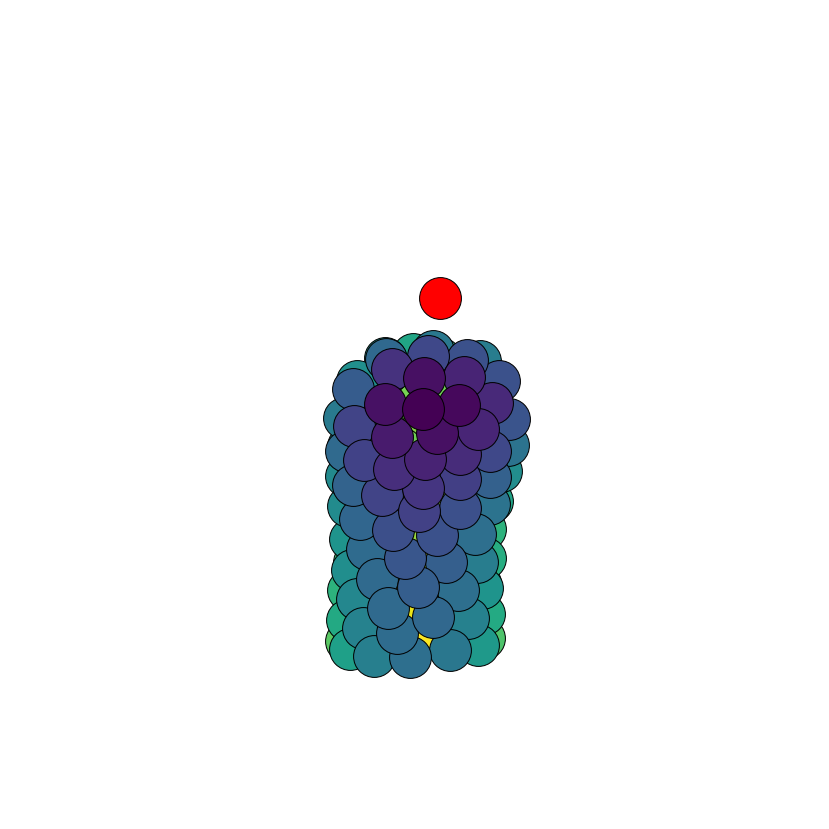

In [4]:
# Create a 3D figure
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Sort points based on z-coordinates for depth ordering
sorted_indices = np.argsort(z_coords)  # Sort by z for depth sorting
sorted_x_coords = x_coords[sorted_indices]
sorted_y_coords = y_coords[sorted_indices]
sorted_z_coords = z_coords[sorted_indices]
sorted_mes_mask = mes_mask[sorted_indices]
sorted_colors = colors[sorted_indices]
sorted_q_vectors = q[sorted_indices]

#sorted_q_vectors[:,0] = 1
#sorted_q_vectors[:,1] = 0
#sorted_q_vectors[:,2] = 0

# Plot circles at (x, y, z) positions
for (x, y, z, is_special, color) in zip(
    sorted_x_coords, sorted_y_coords, sorted_z_coords, sorted_mes_mask, sorted_colors
):
    if is_special:
        ax.scatter(x, y, z, color=mesenchyme_color, edgecolor='black', s=1750)  # Special points
    else:
        ax.scatter(x, y, z, color=color, edgecolor='black', s=1750)  # Regular points


# Set axis limits (optional for centering the view)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(adjusted_z_min, adjusted_z_max)

# Remove axes for a clean look
ax.set_axis_off()

# Adjust the view angle if desired
ax.view_init(elev=90, azim=-90)  # Change elevation and azimuth for the best perspective

# Show the 3D plot
plt.show()

# Save the figure
fig.savefig(left_panel_title, bbox_inches='tight', dpi=500)
plt.close(fig)


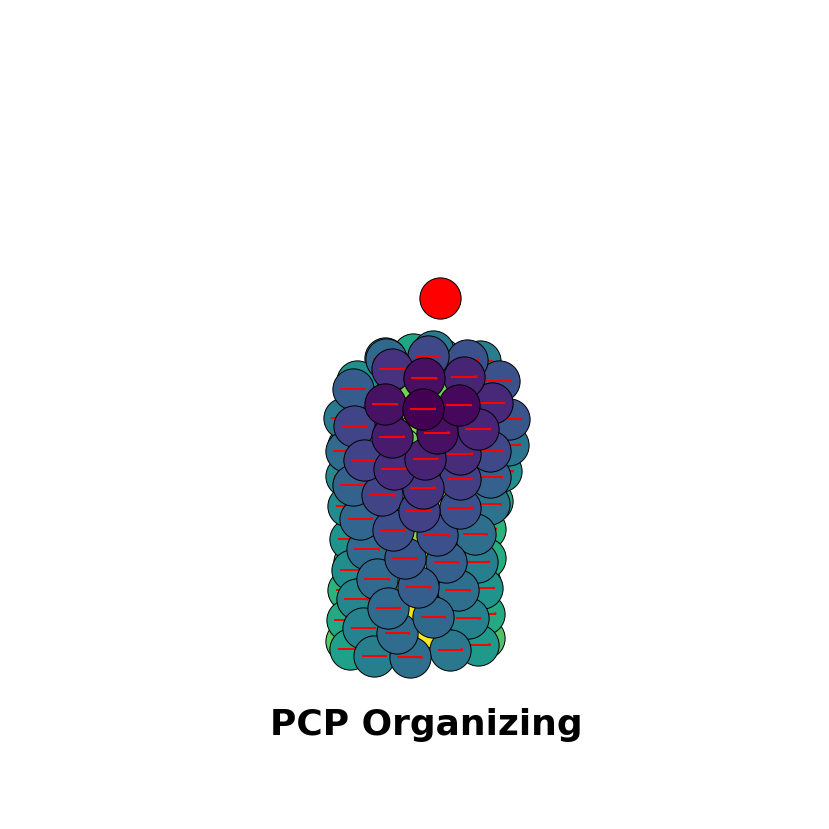

In [5]:
# Create a 3D figure
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Sort points based on z-coordinates for depth ordering
sorted_indices = np.argsort(z_coords)  # Sort by z for depth sorting
sorted_x_coords = x_coords[sorted_indices]
sorted_y_coords = y_coords[sorted_indices]
sorted_z_coords = z_coords[sorted_indices]
sorted_mes_mask = mes_mask[sorted_indices]
sorted_colors = colors[sorted_indices]
sorted_q_vectors = q[sorted_indices]

sorted_q_vectors[:,0] = 1
sorted_q_vectors[:,1] = 0
sorted_q_vectors[:,2] = 0

# Plot circles at (x, y, z) positions
for (x, y, z, is_special, color) in zip(
    sorted_x_coords, sorted_y_coords, sorted_z_coords, sorted_mes_mask, sorted_colors
):
    if is_special:
        ax.scatter(x, y, z, color=mesenchyme_color, edgecolor='black', s=1700)  # Special points
    else:
        ax.scatter(x, y, z, color=color, edgecolor='black', s=1700)  # Regular points

# Add arrows for 3D polarities (q vectors) after sorting
for (x, y, z, q_vec) in zip(
    sorted_x_coords[wnt_mask], sorted_y_coords[wnt_mask], sorted_z_coords[wnt_mask], sorted_q_vectors[wnt_mask]
):
    ax.quiver(
        x, y, z,  # Arrow origins
        q_vec[0], q_vec[1], q_vec[2],  # q vector components
        length=1.2, color='red', linewidth=2, arrow_length_ratio=0.1, pivot='middle')
    

# Set axis limits (optional for centering the view)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(adjusted_z_min, adjusted_z_max)

# Remove axes for a clean look
ax.set_axis_off()

# Adjust the view angle if desired
ax.view_init(elev=90, azim=-90)  # Change elevation and azimuth for the best perspective
text_x = (x_lim[0] + x_lim[1]) / 2  # Middle of x-axis
text_y = y_lim[0] - 0.2 * (y_lim[1] - y_lim[0])  # Slightly below the y-axis limit
text_z = adjusted_z_min  # Bottom of z-axis limit

ax.text(
    text_x, text_y, text_z,  # Position in 3D space
    "PCP Organizing",  # Annotation text
    color=text_color, fontsize=text_fontsize, fontweight="bold", ha="center", va="bottom")

# Show the 3D plot
plt.show()

# Save the figure
fig.savefig(pcp_panel_title, bbox_inches='tight', dpi=500)
plt.close(fig)


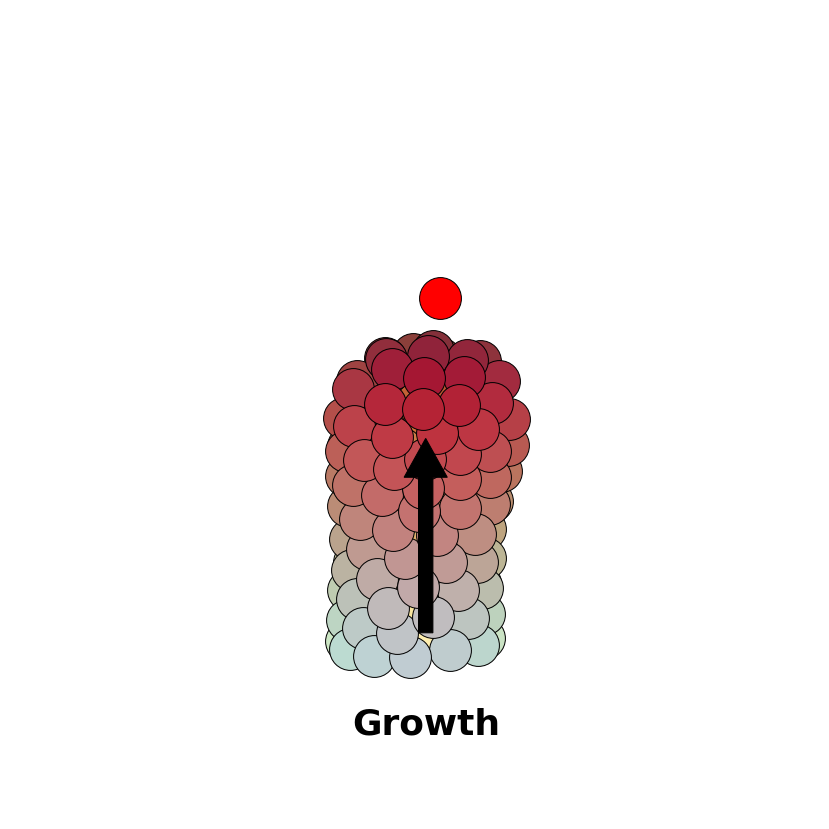

In [6]:
# Calculate distances from special cells
special_points = np.array([x_coords[mes_mask], y_coords[mes_mask], z_coords[mes_mask]]).T
all_points = np.array([x_coords, y_coords, z_coords]).T

distances = np.linalg.norm(
    all_points[:, None, :] - special_points[None, :, :], axis=2
)  # Distances to all special points
min_distances = distances.min(axis=1)  # Minimum distance to a special cell

#min_distances = np.exp(-min_distances)  # Exponential decay for better visualization


# Normalize distances for coloring
normalized_distances = (min_distances - min_distances.min()) / (
    min_distances.max() - min_distances.min()
)

# Create a color map for the distance-based coloring
distance_colors = plt.cm.Reds(1 - normalized_distances)  # Paler with distance

# Create a 3D figure
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Sort points based on z-coordinates for depth ordering
sorted_indices = np.argsort(z_coords)  # Sort by z for depth sorting
sorted_x_coords = x_coords[sorted_indices]
sorted_y_coords = y_coords[sorted_indices]
sorted_z_coords = z_coords[sorted_indices]
sorted_mes_mask = mes_mask[sorted_indices]
sorted_colors = colors[sorted_indices]
sorted_distance_colors = distance_colors[sorted_indices]
sorted_q_vectors = q[sorted_indices]

# Plot circles with combined color schemes
for (x, y, z, is_special, base_color, dist_color) in zip(
    sorted_x_coords,
    sorted_y_coords,
    sorted_z_coords,
    sorted_mes_mask,
    sorted_colors,
    sorted_distance_colors,
):
    combined_color = (np.array(base_color[:3])*0.3 + 0.7*np.array(dist_color[:3]))  # Blend colors
    if is_special:
        ax.scatter(x, y, z, color=mesenchyme_color, edgecolor='black', s=1750)  # Special points
    else:
        ax.scatter(x, y, z, color=combined_color, edgecolor='black', s=1750)  # Regular points

# Set axis limits (optional for centering the view)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(adjusted_z_min, adjusted_z_max)

# Remove axes for a clean look
ax.set_axis_off()

# Adjust the view angle if desired
ax.view_init(elev=90, azim=-90)  # Change elevation and azimuth for the best perspective
# Add annotation in the bottom middle of the original plot
text_x = (x_lim[0] + x_lim[1]) / 2  # Middle of x-axis
text_y = y_lim[0] - 0.2 * (y_lim[1] - y_lim[0])  # Slightly below the y-axis limit
text_z = adjusted_z_min  # Bottom of z-axis limit

ax.text(
    text_x, text_y, text_z,  # Position in 3D space
    "Growth",  # Annotation text
    color=text_color, fontsize=text_fontsize, fontweight="bold", ha="center", va="bottom")


# Overlay a 2D arrow fixed to the plot
arrow_x_start = 0.52  # Normalized x-coordinate (center of the plot horizontally)
arrow_y_start = 0.3  # Normalized y-coordinate (20% up from the bottom of the figure)
arrow_dx = 0  # Normalized width of the arrow
arrow_dy = 0.18  # Normalized height of the arrow

fig.add_artist(
    plt.Arrow(
        arrow_x_start, arrow_y_start,  # Start position (normalized)
        arrow_dx, arrow_dy,  # Direction and size
        color="black", width=0.05
    )
)


# Show the 3D plot
plt.show()

# Save the figure
fig.savefig(growth_panel_title, bbox_inches='tight', dpi=500)
plt.close(fig)


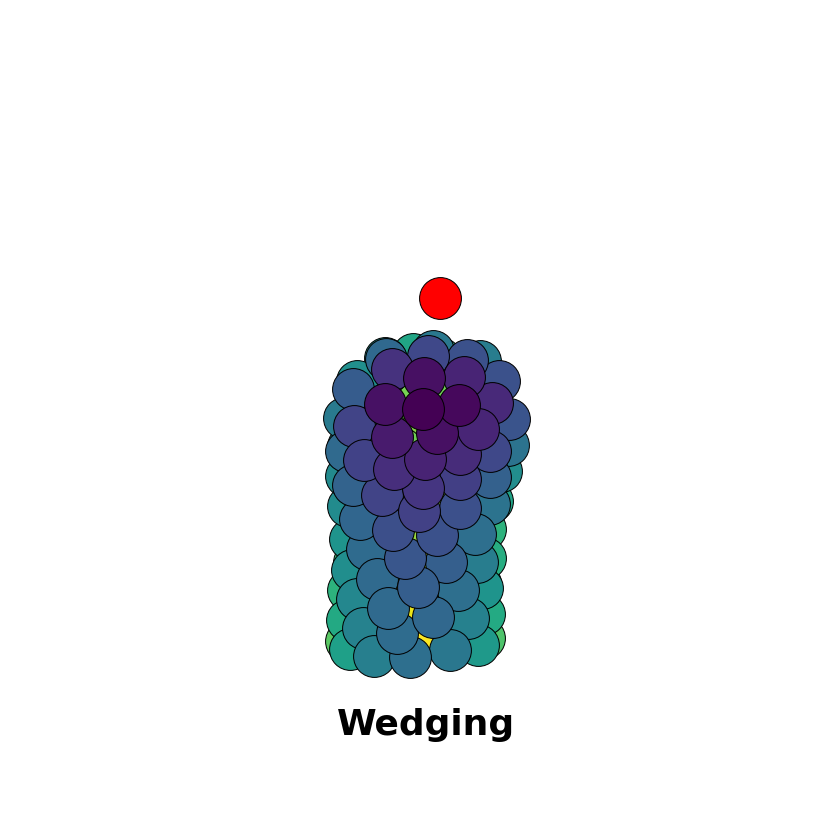

In [7]:
# Create a 3D figure
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Sort points based on z-coordinates for depth ordering
sorted_indices = np.argsort(z_coords)  # Sort by z for depth sorting
sorted_x_coords = x_coords[sorted_indices]
sorted_y_coords = y_coords[sorted_indices]
sorted_z_coords = z_coords[sorted_indices]
sorted_mes_mask = mes_mask[sorted_indices]
sorted_colors = colors[sorted_indices]
sorted_q_vectors = q[sorted_indices]

#sorted_q_vectors[:,0] = 1
#sorted_q_vectors[:,1] = 0
#sorted_q_vectors[:,2] = 0

# Plot circles at (x, y, z) positions
for (x, y, z, is_special, color) in zip(
    sorted_x_coords, sorted_y_coords, sorted_z_coords, sorted_mes_mask, sorted_colors
):
    if is_special:
        ax.scatter(x, y, z, color=mesenchyme_color, edgecolor='black', s=1750)  # Special points
    else:
        ax.scatter(x, y, z, color=color, edgecolor='black', s=1750)  # Regular points


# Set axis limits (optional for centering the view)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(adjusted_z_min, adjusted_z_max)

# Remove axes for a clean look
ax.set_axis_off()

# Adjust the view angle if desired
ax.view_init(elev=90, azim=-90)  # Change elevation and azimuth for the best perspective
text_x = (x_lim[0] + x_lim[1]) / 2  # Middle of x-axis
text_y = y_lim[0] - 0.2 * (y_lim[1] - y_lim[0])  # Slightly below the y-axis limit
text_z = adjusted_z_min  # Bottom of z-axis limit

ax.text(
    text_x, text_y, text_z,  # Position in 3D space
    "Wedging",  # Annotation text
    color=text_color, fontsize=text_fontsize, fontweight="bold", ha="center", va="bottom")

# Show the 3D plot
plt.show()

# Save the figure
fig.savefig(wedging_panel_title, bbox_inches='tight', dpi=500)
plt.close(fig)


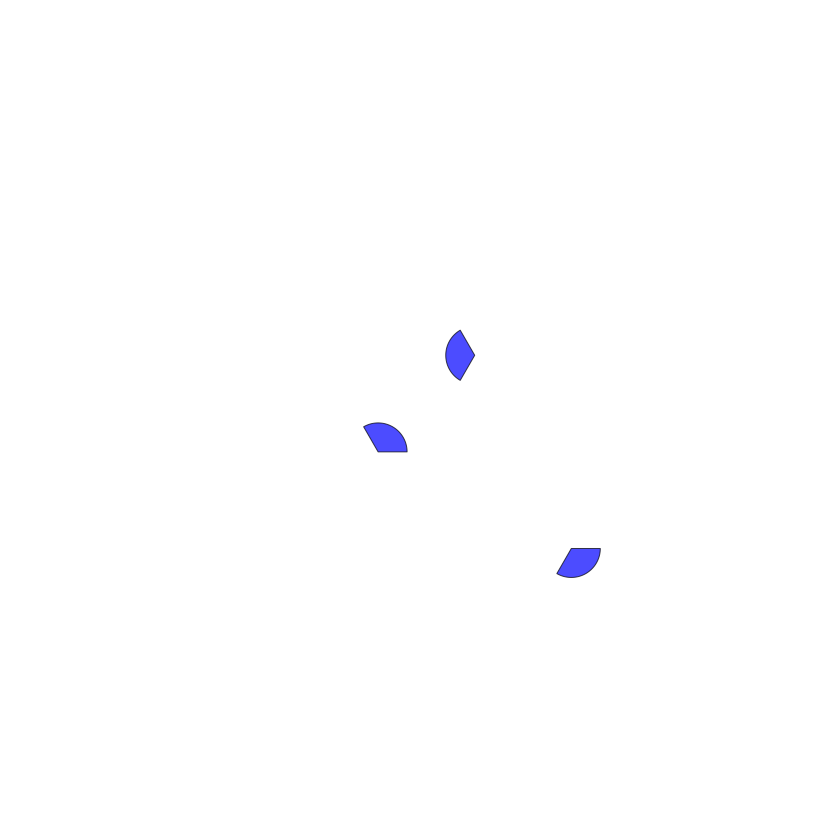

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d
import numpy as np

# Create a 3D figure
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Parameters for wedges
cell_positions = [(10, 10, 0), (15, 15, 0), (20, 5, 0)]  # Cell center positions (x, y, z)
radius = 1.5  # Radius of the wedges
angles = [(0, 120), (120, 240), (240, 360)]  # Start and end angles for wedges

# Function to create 3D wedge vertices
def create_wedge(center, radius, theta1, theta2, z):
    x, y = center
    theta = np.linspace(np.radians(theta1), np.radians(theta2), 50)  # Angles in radians
    x_vals = np.append([x], x + radius * np.cos(theta))  # X-coordinates
    y_vals = np.append([y], y + radius * np.sin(theta))  # Y-coordinates
    z_vals = np.full_like(x_vals, z)  # Z-coordinates (flat surface)
    vertices = np.column_stack((x_vals, y_vals, z_vals))  # Combine into vertices
    return vertices

# Add wedges
for (x, y, z), (start_angle, end_angle) in zip(cell_positions, angles):
    vertices = create_wedge((x, y), radius, start_angle, end_angle, z)
    # Add the wedge as a Poly3DCollection
    poly = art3d.Poly3DCollection([vertices], color='blue', alpha=0.7, edgecolor='black')
    ax.add_collection3d(poly)

# Set axis limits
ax.set_xlim(0, 25)
ax.set_ylim(0, 25)
ax.set_zlim(0, 5)

# Remove axes for a clean look
ax.set_axis_off()

# Adjust the view angle
ax.view_init(elev=90, azim=-90)

# Show the 3D plot
plt.show()


In [9]:
from PIL import Image, ImageDraw

# Paths to your saved figures
figure_paths = [
    left_panel_title,  # Replace with your actual file paths
    pcp_panel_title,
    growth_panel_title,
    wedging_panel_title
]

# Open the saved figures
figures = [Image.open(path) for path in figure_paths]

# Determine the size of the canvas
single_width, single_height = figures[0].size  # Assuming all figures have the same size
canvas_width = single_width * 2  # Left figure and right stack
print(f'canvas_width 2 panels: {canvas_width}')
canvas_height = single_height * 3  # Tall enough to stack 3 figures on the right

# Create a white canvas
canvas = Image.new("RGB", (canvas_width, canvas_height), "white")

# Paste the first figure on the left side, centered vertically
left_x = 0
left_y = (canvas_height - single_height) // 2
canvas.paste(figures[0], (left_x, left_y))

# Paste the remaining three figures stacked vertically on the right side
for i in range(3):
    right_x = single_width
    right_y = i * single_height
    canvas.paste(figures[i + 1], (right_x, right_y))

# Draw arrows from the left figure to each right-side figure
draw = ImageDraw.Draw(canvas)

# Arrow starting point (center of the left figure)
arrow_start_x = left_x + single_width - single_width / 4  # Right edge of the left figure
arrow_start_y = left_y + single_height / 1.7  # Vertical center of the left figure

for i in range(3):
    # Arrow endpoint (center of each right-side figure)
    arrow_end_x = 1.35 * right_x  # Left edge of the right figures
    arrow_end_y = i * single_height + single_height // 1.7  # Vertical center of each right figure
    
    # Draw the arrow line
    draw.line(
        [(arrow_start_x, arrow_start_y), (arrow_end_x, arrow_end_y)],
        fill="black", width=50
    )
    
    # Add solid arrowhead
    arrowhead_size = 400
    dx = arrow_end_x - arrow_start_x
    dy = arrow_end_y - arrow_start_y
    arrow_length = (dx**2 + dy**2)**0.5
    ux, uy = dx / arrow_length, dy / arrow_length  # Unit vector
    vx, vy = -uy, ux  # Perpendicular vector for arrowhead
    
    # Calculate arrowhead points
    tip = (arrow_end_x, arrow_end_y)
    left = (
        arrow_end_x - arrowhead_size * (ux + 0.5 * vx),
        arrow_end_y - arrowhead_size * (uy + 0.5 * vy)
    )
    right = (
        arrow_end_x - arrowhead_size * (ux - 0.5 * vx),
        arrow_end_y - arrowhead_size * (uy - 0.5 * vy)
    )
    
    # Draw the filled arrowhead
    draw.polygon([tip, left, right], fill="black")

# Save or display the combined figure
canvas.save("combined_figure_mes_effects.png")
#canvas.show()


canvas_width 2 panels: 11524


In [10]:
start_bud_title = "left_low_panel.png"
two_mes_title = "mid_low_panel.png"
bifurcation_title = "right_low_panel.png"

(-19.94239330291748, 3.6953163146972656)


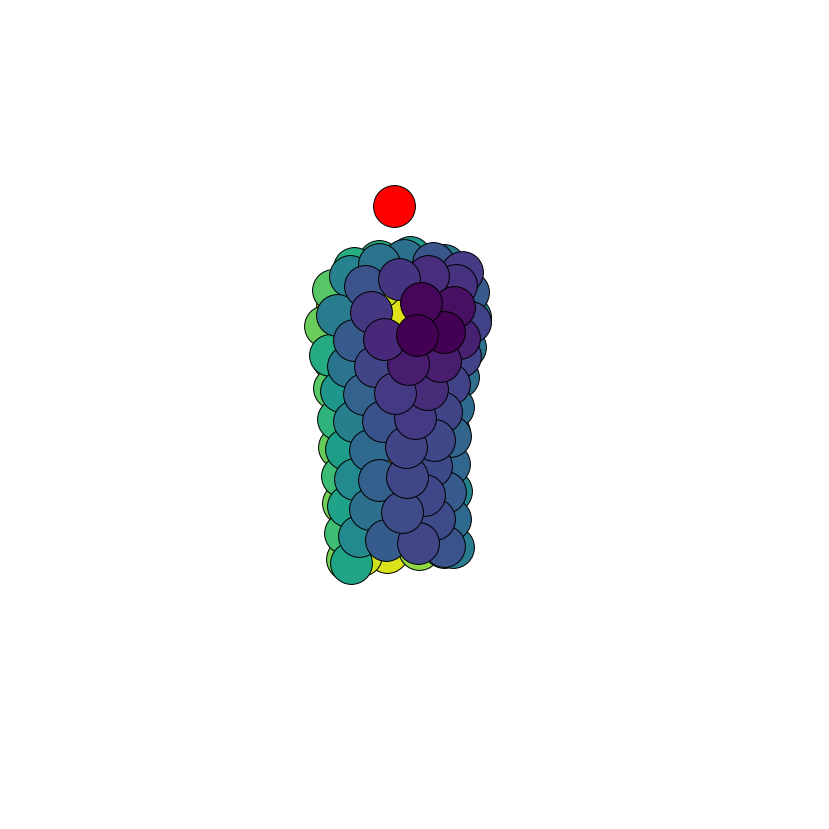

In [11]:
div_time = 12000
lam3 = 0.1
lam4 = 0.3
folder = f'master_thesis_animations/growth_wnt_alpha_bifurcation/isotropic_alpha_wnt_cells/div_time={div_time}_lam3={lam3}/sim_mes_div_time={div_time}_lam3={lam3}.npy'


x, p, q,cc = load_data(folder,scene=116)
mask = x[:, 0] > 10
filtered_x = x[mask]

# Extract x, y, and z coordinates
x_coords = filtered_x[:, 1]  # x-axis is now x[:, 1]
y_coords = filtered_x[:, 0]  # y-axis is now x[:, 0]
z_coords = filtered_x[:, 2]
sorted_indices = np.argsort(z_coords)  # Sort z_coords in ascending order
x_coords = x_coords[sorted_indices]
y_coords = y_coords[sorted_indices]
z_coords = z_coords[sorted_indices]
cc = cc[mask][sorted_indices]

rotation_matrix = np.array([
    [1, 0, 0],
    [0, 0, -1],
    [0, 1, 0]
])

points = np.array([x_coords.flatten(), y_coords.flatten(), z_coords.flatten()])

# Apply the rotation
rotated_points = rotation_matrix @ points
x_coords_new = rotated_points[0]
y_coords_new = rotated_points[1]
z_coords_new = rotated_points[2]

mes_idx = np.where(cc == 2)[0]
mes_mask = np.zeros(len(x_coords_new), dtype=bool)
mes_mask[mes_idx] = True
wnt_mask = cc != 3

z_min, z_max = z_coords_new.min(), z_coords_new.max()
padding = 0.1 * (z_max - z_min)  # Exclude 10% of the range on both sides
adjusted_z_min = z_min - padding
adjusted_z_max = z_max + 0

# Determine the range of x and y coordinates
x_min, x_max = z_coords_new.min(), z_coords_new.max()
y_min, y_max = y_coords_new.min(), y_coords_new.max()

# Adjust the limits to ensure they are of the same size
range_max = max(x_max - x_min, y_max - y_min)
x_center = (x_min + x_max) / 2
y_center = (y_min + y_max) / 2

x_lim = (x_center - range_max / 2- 30, x_center + range_max / 2 - 30)
y_lim = (y_center - range_max / 2, y_center + range_max / 2 + 10)

cm = plt.get_cmap("viridis")
cNorm = mpl.colors.Normalize()
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=cm)
scalarMap.set_array([])
colors = scalarMap.to_rgba(-x_coords_new)



# Create a 3D figure
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')


# Plot circles at (x, y, z) positions
for (x, y, z, is_special, color) in zip(
    x_coords_new, y_coords_new, z_coords_new, mes_mask, colors
):
    if is_special:
        ax.scatter(x, y, z, color=mesenchyme_color, edgecolor='black', s=1750)  # Special points
    else:
        ax.scatter(x, y, z, color=color, edgecolor='black', s=1750)  # Regular points

print(x_lim)
# Set axis limits (optional for centering the view)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(adjusted_z_min, adjusted_z_max)

# Remove axes for a clean look
ax.set_axis_off()

# Adjust the view angle if desired
ax.view_init(elev=0, azim=-20)  # Change elevation and azimuth for the best perspective

# Show the 3D plot
plt.show()

## Save the figure
fig.savefig(start_bud_title, bbox_inches='tight', dpi=500)
plt.close(fig)


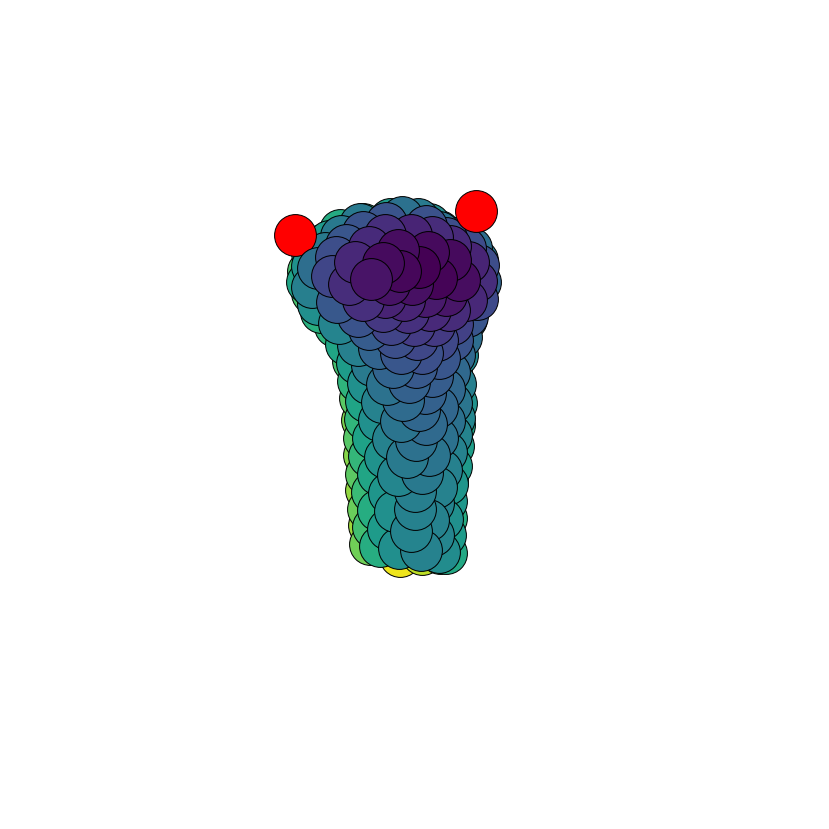

In [12]:
div_time = 12000
lam3 = 0.1
lam4 = 0.3
folder = f'master_thesis_animations/growth_wnt_alpha_bifurcation/isotropic_alpha_wnt_cells/div_time={div_time}_lam3={lam3}/sim_mes_div_time={div_time}_lam3={lam3}.npy'


x, p, q,cc = load_data(folder,scene=160)
mask = x[:, 0] > 10
filtered_x = x[mask]

# Extract x, y, and z coordinates
x_coords = filtered_x[:, 1]  # x-axis is now x[:, 1]
y_coords = filtered_x[:, 0]  # y-axis is now x[:, 0]
z_coords = filtered_x[:, 2]
sorted_indices = np.argsort(z_coords)  # Sort z_coords in ascending order
x_coords = x_coords[sorted_indices]
y_coords = y_coords[sorted_indices]
z_coords = z_coords[sorted_indices]
cc = cc[mask][sorted_indices]

rotation_matrix = np.array([
    [1, 0, 0],
    [0, 0, -1],
    [0, 1, 0]
])

points = np.array([x_coords.flatten(), y_coords.flatten(), z_coords.flatten()])

# Apply the rotation
rotated_points = rotation_matrix @ points
x_coords_new = rotated_points[0]
y_coords_new = rotated_points[1]
z_coords_new = rotated_points[2]

mes_idx = np.where(cc == 2)[0]
mes_mask = np.zeros(len(x_coords_new), dtype=bool)
mes_mask[mes_idx] = True
wnt_mask = cc != 3

z_min, z_max = z_coords_new.min(), z_coords_new.max()
padding = 0.1 * (z_max - z_min)  # Exclude 10% of the range on both sides
adjusted_z_min = z_min - padding
adjusted_z_max = z_max + 0

# Determine the range of x and y coordinates
x_min, x_max = z_coords_new.min(), z_coords_new.max()
y_min, y_max = y_coords_new.min(), y_coords_new.max()

# Adjust the limits to ensure they are of the same size
range_max = max(x_max - x_min, y_max - y_min)
x_center = (x_min + x_max) / 2
y_center = (y_min + y_max) / 2

x_lim = (x_center - range_max / 2-30, x_center + range_max / 2-30)
y_lim = (y_center - range_max / 2, y_center + range_max / 2 + 10)

cm = plt.get_cmap("viridis")
cNorm = mpl.colors.Normalize()
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=cm)
scalarMap.set_array([])
colors = scalarMap.to_rgba(-x_coords_new)



# Create a 3D figure
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')


# Plot circles at (x, y, z) positions
for (x, y, z, is_special, color) in zip(
    x_coords_new, y_coords_new, z_coords_new, mes_mask, colors
):
    if is_special:
        ax.scatter(x, y, z, color=mesenchyme_color, edgecolor='black', s=1750)  # Special points
    else:
        ax.scatter(x, y, z, color=color, edgecolor='black', s=1750)  # Regular points


# Set axis limits (optional for centering the view)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(adjusted_z_min, adjusted_z_max)

# Remove axes for a clean look
ax.set_axis_off()

# Adjust the view angle if desired
ax.view_init(elev=0, azim=-20)  # Change elevation and azimuth for the best perspective

# Show the 3D plot
plt.show()

## Save the figure
fig.savefig(two_mes_title, bbox_inches='tight', dpi=500)
plt.close(fig)


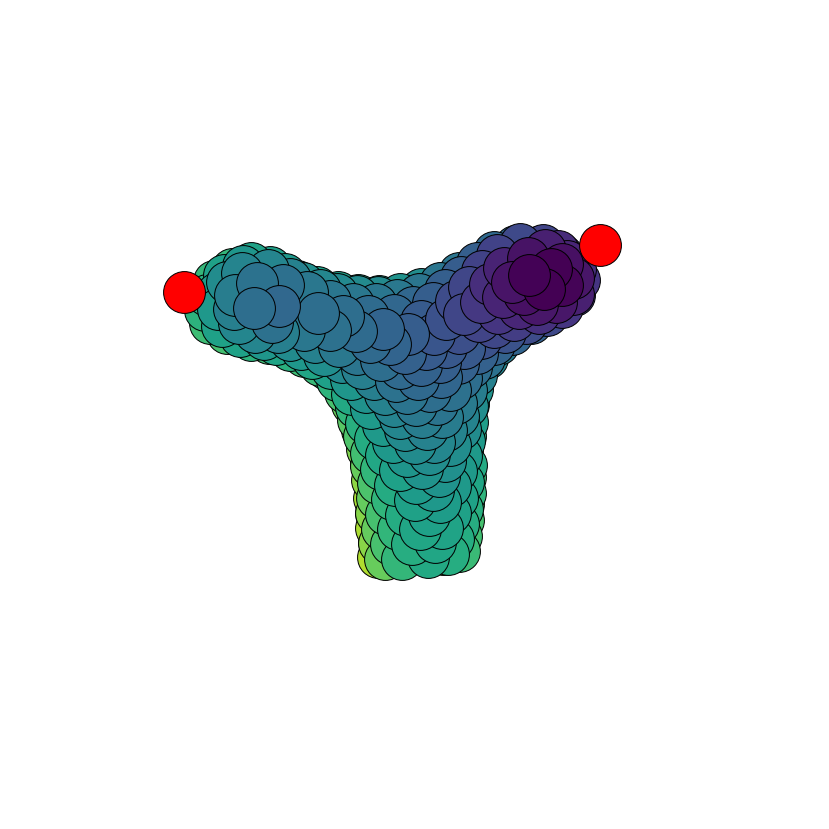

In [13]:
div_time = 12000
lam3 = 0.1
lam4 = 0.3
folder = f'master_thesis_animations/growth_wnt_alpha_bifurcation/isotropic_alpha_wnt_cells/div_time={div_time}_lam3={lam3}/sim_mes_div_time={div_time}_lam3={lam3}.npy'


x, p, q,cc = load_data(folder,scene=200)
mask = x[:, 0] > 16
filtered_x = x[mask]

# Extract x, y, and z coordinates
x_coords = filtered_x[:, 1]  # x-axis is now x[:, 1]
y_coords = filtered_x[:, 0]  # y-axis is now x[:, 0]
z_coords = filtered_x[:, 2]
sorted_indices = np.argsort(z_coords)  # Sort z_coords in ascending order
x_coords = x_coords[sorted_indices]
y_coords = y_coords[sorted_indices]
z_coords = z_coords[sorted_indices]
cc = cc[mask][sorted_indices]

rotation_matrix = np.array([
    [1, 0, 0],
    [0, 0, -1],
    [0, 1, 0]
])

points = np.array([x_coords.flatten(), y_coords.flatten(), z_coords.flatten()])

# Apply the rotation
rotated_points = rotation_matrix @ points
x_coords_new = rotated_points[0]
y_coords_new = rotated_points[1]
z_coords_new = rotated_points[2]

mes_idx = np.where(cc == 2)[0]
mes_mask = np.zeros(len(x_coords_new), dtype=bool)
mes_mask[mes_idx] = True
wnt_mask = cc != 3

z_min, z_max = z_coords_new.min(), z_coords_new.max()
padding = 0.1 * (z_max - z_min)  # Exclude 10% of the range on both sides
adjusted_z_min = z_min - padding
adjusted_z_max = z_max + padding

# Determine the range of x and y coordinates
x_min, x_max = x_coords_new.min(), x_coords_new.max()
y_min, y_max = y_coords_new.min(), y_coords_new.max()

# Adjust the limits to ensure they are of the same size
range_max = max(x_max - x_min, y_max - y_min)
x_center = (x_min + x_max) / 2
y_center = (y_min + y_max) / 2

x_lim = (x_center - range_max / 2, x_center + range_max / 2)
y_lim = (y_center - range_max / 2, y_center + range_max / 2 + 10)

cm = plt.get_cmap("viridis")
cNorm = mpl.colors.Normalize()
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=cm)
scalarMap.set_array([])
colors = scalarMap.to_rgba(-x_coords_new)



# Create a 3D figure
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')


# Plot circles at (x, y, z) positions
for (x, y, z, is_special, color) in zip(
    x_coords_new, y_coords_new, z_coords_new, mes_mask, colors
):
    if is_special:
        ax.scatter(x, y, z, color=mesenchyme_color, edgecolor='black', s=1750)  # Special points
    else:
        ax.scatter(x, y, z, color=color, edgecolor='black', s=1750)  # Regular points


# Set axis limits (optional for centering the view)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(adjusted_z_min, adjusted_z_max)

# Remove axes for a clean look
ax.set_axis_off()

# Adjust the view angle if desired
ax.view_init(elev=0, azim=-20)  # Change elevation and azimuth for the best perspective

# Show the 3D plot
plt.show()

## Save the figure
fig.savefig(bifurcation_title, bbox_inches='tight', dpi=500)
plt.close(fig)


canvas width 3 panels: 11524
[1920, 3649.0, 4609.0]


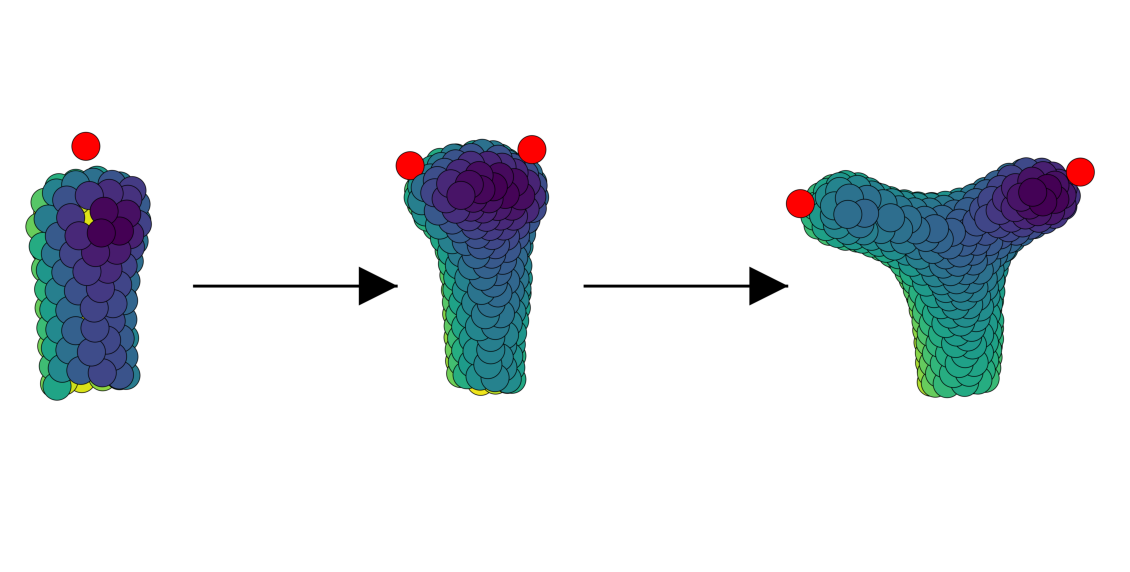

In [14]:
from PIL import Image

# Paths to your saved figures
figure_paths = [
    start_bud_title,  # Replace with your actual file paths
    two_mes_title,
    bifurcation_title
]
# Open the saved figures
figures = [Image.open(path) for path in figure_paths]
#11524
# Determine the size of the canvas
single_width, single_height = figures[0].size  # Assuming all figures have the same size
canvas_width = single_width * 2  # Total width for three figures side by side
print(f'canvas width 3 panels: {canvas_width}')
canvas_height = single_height  # Height remains the same

# Create a white canvas
canvas = Image.new("RGB", (canvas_width, canvas_height), "white")
overlaps = [single_width//3, (1.9*single_width)//3, (2.4*single_width)//3]
print(overlaps)
for i, figure in enumerate(figures):
	x_position = (i*single_width - int(overlaps[i]))  # Adjust horizontal position for overlap
	canvas.paste(figure, (x_position, 0))
# Draw arrows
draw = ImageDraw.Draw(canvas)

# Arrow from the first to the second figure
arrow_start_x1 = single_width - single_width / 3 - overlaps[0]  # Right edge of the first figure
arrow_start_y1 = single_height / 2  # Vertical center of the first figure
arrow_end_x1 = single_width + single_width / 3 - overlaps[1] # Left edge of the second figure
arrow_end_y1 = single_height / 2

arrow_length_2 = (arrow_end_x1-arrow_start_x1)

# Arrow from the second to the third figure
arrow_start_x2 = 2 * single_width - single_width / 3 - overlaps[1] # Right edge of the second figure
arrow_start_y2 = single_height / 2  # Vertical center of the second figure
arrow_end_x2 = arrow_length_2 + arrow_start_x2 # Left edge of the third figure
arrow_end_y2 = single_height / 2

def draw_thick_arrow(draw, start_x, start_y, end_x, end_y, arrowhead_size=400, line_width=20):
    """Draw a thick arrow with a solid arrowhead."""
    # Draw the arrow line
    draw.line([(start_x, start_y), (end_x, end_y)], fill="black", width=line_width)
    
    # Add solid arrowhead
    dx = end_x - start_x
    dy = end_y - start_y
    arrow_length = (dx**2 + dy**2)**0.5
    ux, uy = dx / arrow_length, dy / arrow_length  # Unit vector
    vx, vy = -uy, ux  # Perpendicular vector for arrowhead
    
    # Calculate arrowhead points
    tip = (end_x, end_y)
    left = (
        end_x - arrowhead_size * (ux + 0.5 * vx),
        end_y - arrowhead_size * (uy + 0.5 * vy)
    )
    right = (
        end_x - arrowhead_size * (ux - 0.5 * vx),
        end_y - arrowhead_size * (uy - 0.5 * vy)
    )
    
    # Draw the filled arrowhead
    draw.polygon([tip, left, right], fill="black")

# Draw arrows
draw_thick_arrow(draw, arrow_start_x1, arrow_start_y1, arrow_end_x1, arrow_end_y1, arrowhead_size=400, line_width=30)
draw_thick_arrow(draw, arrow_start_x2, arrow_start_y2, arrow_end_x2, arrow_end_y2, arrowhead_size=400, line_width=30)

# Save or display the combined figure
canvas.save("combined_figure_division.png")
# Load and display the saved image using Matplotlib
image = Image.open("combined_figure_division.png")
plt.figure(figsize=(20, 30))  # Adjust figure size as needed
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner look
plt.show()

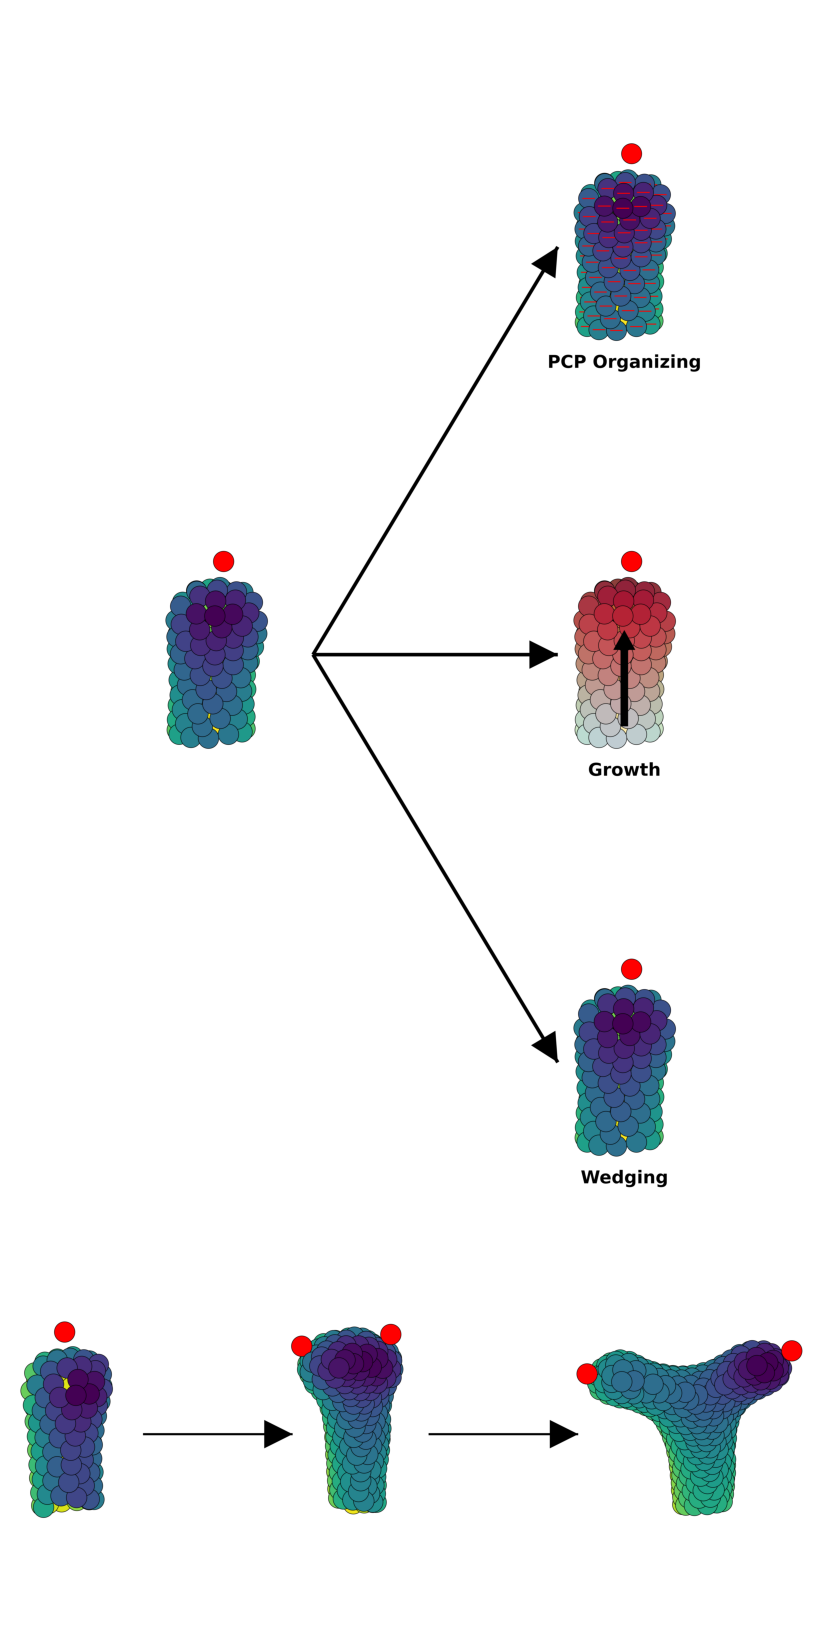

In [15]:
Image.MAX_IMAGE_PIXELS = None 
# Paths to your saved figures
figure_paths = [
    "combined_figure_mes_effects.png",  # Replace with your actual file paths
    "combined_figure_division.png"
]

# Open the saved figures
figures = [Image.open(path) for path in figure_paths]

# Determine the size of the canvas
canvas_width = figures[0].width  # Width remains the same
canvas_height = figures[0].height + figures[1].height  # Total height is the sum of both figures

# Create a white canvas
canvas = Image.new("RGB", (canvas_width, canvas_height), "white")

# Paste the first figure at the top
canvas.paste(figures[0], (0, 0))  # Top-left corner

# Paste the second figure below the first one
canvas.paste(figures[1], (0, figures[0].height))  # Below the first figure

# Save or display the combined figure
canvas.save("combined_figure_vertically.png")
image = Image.open("combined_figure_vertically.png")
plt.figure(figsize=(60, 30))  # Adjust figure size as needed
plt.imshow(image)
plt.axis("off")  # Hide axes for a cleaner look
plt.show()